<a href="https://colab.research.google.com/github/pranavpathak08/MLalgos/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Logistic Regression for Binary classification on the `cleveland heart-disease` dataset available on `http://archive.ics.uci.edu/`.

**Cleveland Heart-disease dataset**

Attribute Information:

1. `Age` (in years)
2. `Sex` (1 = male; 0 = female)
3. `cp` -chest pain type
4. `trestbps` - resting blood pressure (anything above 130-140 is typically cause for concern)
5. `chol-serum` cholestoral in mg/dl (above 200 is cause for concern)
6. `fbs` - fasting blood sugar ( > 120 mg/dl) (1 = true; 0 = false)
7. `restecg` - resting electrocardiographic results (0 = normal;1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. `thalach`-maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - depression induced by exercise relative to rest
11. `slope` -  slope of the peak exercise ST segment (1 = upsloping; 2 = flat Value; 3 = downsloping)
12. `ca` - number of major vessels (0-3) colored by flourosopy
13. `thal` - (3 = normal; 6 = fixed defect; 7 = reversable defect
14. **`num`** (target) -  diagnosis of heart disease (angiographic disease status)( 0: < 50% diameter narrowing ; 1: > 50% diameter narrowing)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol',  'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'num']

heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None, names=cols)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## Preprocessing

In [ ]:
heart_data['num'].unique()

array([0, 2, 1, 3, 4])

our target feature `num` has unique values ranging from 0 (absence) to 4 (presence). We need to replace instances with labels 2,3,4 to 1, so that we can apply `Binary Classification`

In [ ]:
heart_data.replace({'num' : {2:1, 3:1, 4:1}}, inplace=True)
heart_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### Checking fro null or missing values

In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

We have 2 categorical features `ca` and `thal`. Let's check there unique values.

In [ ]:
print('ca unique values', heart_data['ca'].unique())
print('thal unique values ', heart_data['thal'].unique())

ca unique values ['0.0' '3.0' '2.0' '1.0' '?']
thal unique values  ['6.0' '3.0' '7.0' '?']


We see there are missing values in these 2 features. We need to impute these values. For this i'll use `SimpleImputer` from `sklearn.impute`

In [ ]:
heart_data.replace('?', np.nan, inplace=True)
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_imputed = imputer.transform(heart_data)
heart_data_imputed = pd.DataFrame(heart_imputed, columns = cols)
heart_data_imputed


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1.0


In [ ]:
heart_data_imputed['ca'].unique(), heart_data_imputed['thal'].unique()

(array([0.       , 3.       , 2.       , 1.       , 0.6722408]),
 array([6.        , 3.        , 7.        , 4.73421927]))

Splitting the data into input and target features

In [ ]:
y = heart_data_imputed['num']
y = np.array(y)
y

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

In [ ]:
del heart_data_imputed['num']

In [ ]:
heart_data_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Correlation between input features

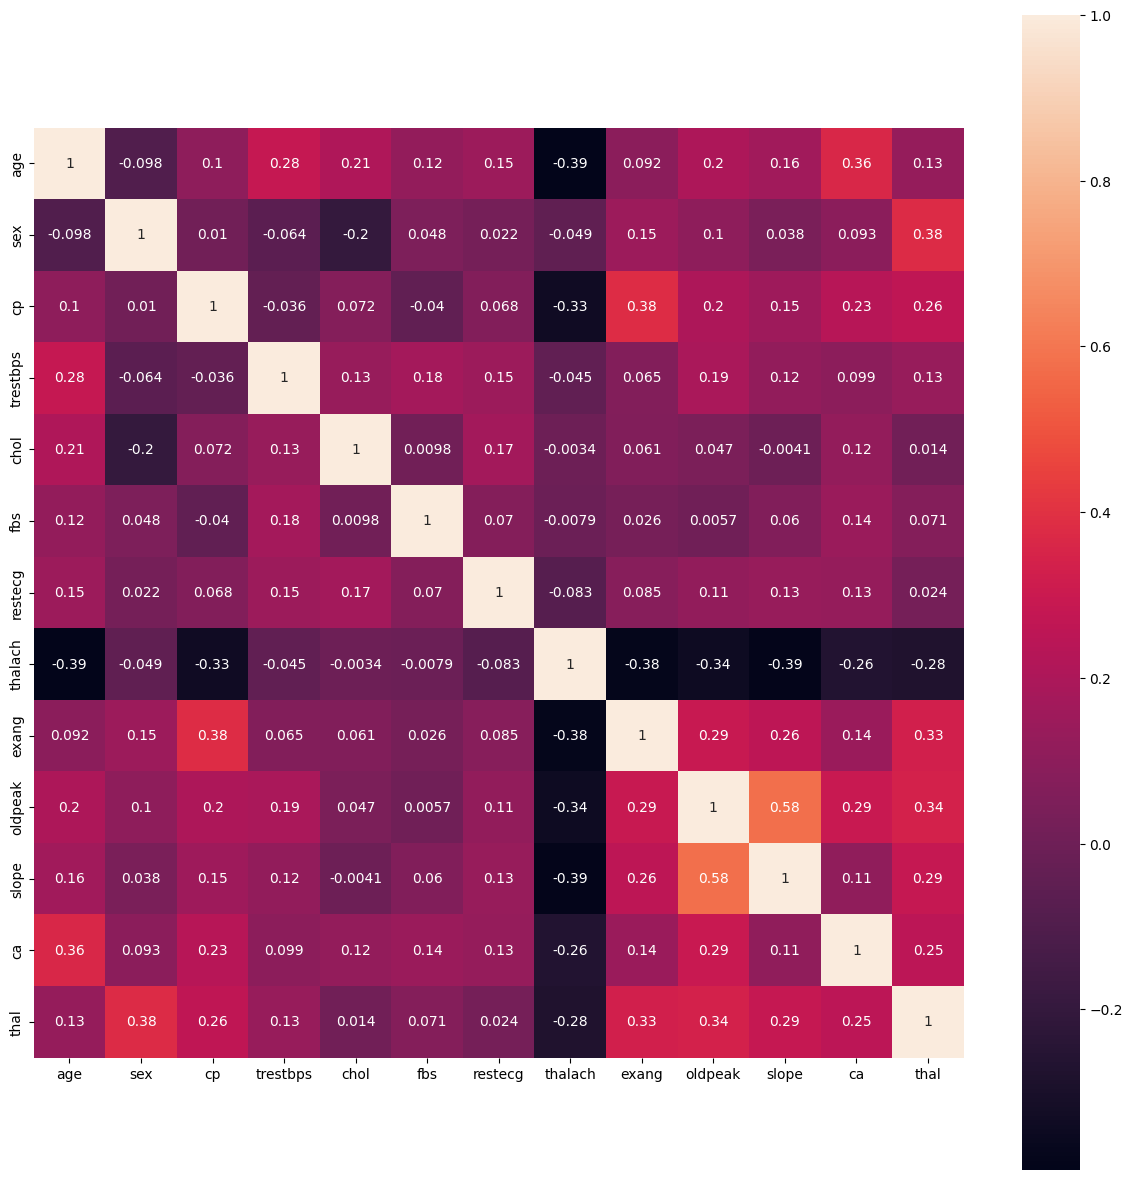

In [ ]:
plt.figure(figsize=[15,15])
sns.heatmap(heart_data_imputed.corr(), annot=True, square=True)
plt.show()

## Splitting data into training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart_data_imputed, y, test_size=0.25, random_state=0)

print('Shape of training data : ', X_train.shape)
print('Shape of training labels : ', y_train.shape)
print('Shape of testing data : ', X_test.shape)
print('Shape of testing labels : ', y_test.shape)

Shape of training data :  (227, 13)
Shape of training labels :  (227,)
Shape of testing data :  (76, 13)
Shape of testing labels :  (76,)


In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
173,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.000000,3.0
261,58.0,0.0,2.0,136.0,319.0,1.0,2.0,152.0,0.0,0.0,1.0,2.000000,3.0
37,57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.000000,6.0
101,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.000000,3.0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,0.672241,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,58.0,1.0,4.0,146.0,218.0,0.0,0.0,105.0,0.0,2.0,2.0,1.000000,7.0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,0.672241,7.0
117,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.000000,3.0
47,50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.000000,7.0


There is a huge variation between the numerical values of the features. We need to `Feature Normalisation` before training.

In [ ]:
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.fit_transform(X_test)

In [ ]:
lr = LogisticRegression()
classifier = lr.fit(X_train_norm, y_train)
score = lr.score(X_train_norm, y_train)
print('Training score : ', score)
y_pred = lr.predict(X_test_norm)

Training score :  0.8634361233480177


Let's see some of the metrics

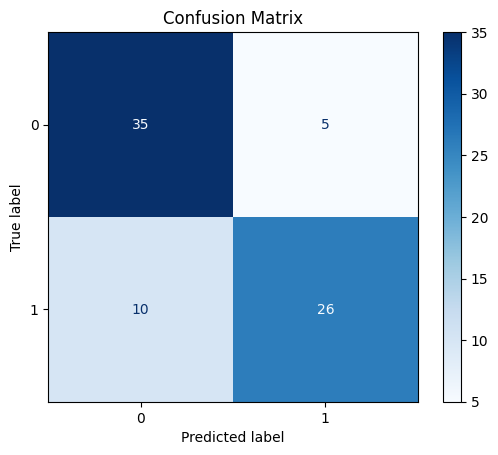

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = ["0", "1"]
disp = ConfusionMatrixDisplay.from_estimator(classifier,X_test_norm,y_test, display_labels=class_names, cmap=plt.cm.Blues)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82        40
         1.0       0.84      0.72      0.78        36

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



That's a good report although we can still try and tune hyperparameters.
Using `RandomizedSearchCV` and `GridSearchCV`

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

**RandomizedSearchCV**

In [ ]:
lr_grid_rs = {"C" : np.logspace(-4, 4, 20),
              "solver" : ["liblinear"]}

np.random.seed(42)
lr_rs = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=lr_grid_rs,
                           cv=5,
                           n_iter=20,
                           verbose=True)

lr_rs.fit(X_train_norm, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
lr_rs.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [ ]:
lr_rs.score(X_train_norm, y_train)

0.8678414096916299

In [ ]:
y_preds = lr_rs.predict(X_test_norm)
print(confusion_matrix(y_test, y_preds))


[[36  4]
 [ 9 27]]


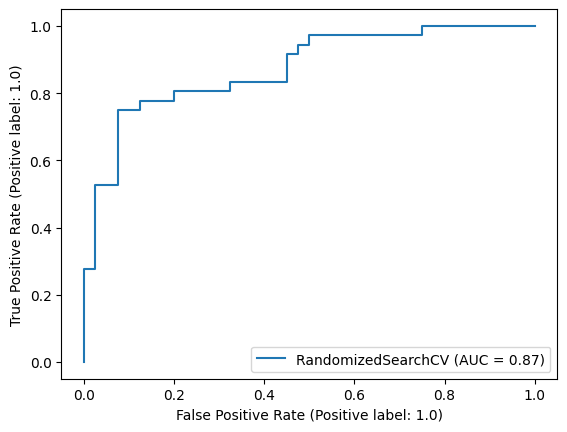

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr_rs, X_test_norm, y_test)

**GridSearchCV**

In [ ]:
lr_grid_gs = {"C" : np.logspace(-4,4,30),
              "solver" : ["liblinear"]}

lr_gs = GridSearchCV(LogisticRegression(),
                     param_grid=lr_grid_gs,
                     cv=5,
                     verbose=True)

lr_gs.fit(X_train_norm, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
lr_gs.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [ ]:
lr_gs.score(X_train_norm, y_train)

0.8634361233480177

In [ ]:
y_preds = lr_gs.predict(X_test_norm)
print(confusion_matrix(y_test, y_preds))

[[36  4]
 [ 9 27]]


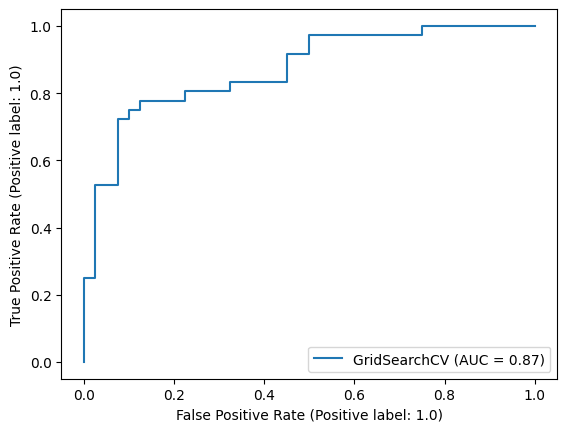

In [ ]:
RocCurveDisplay.from_estimator(lr_gs,X_test_norm, y_test)